**Con el fin de identificar presencia de sesgo sistemático entre la percepción de proveedores y contratistas hacia el Grupo empresarial EPM, se estudiará el promedio entre los calificaciones asignadas por estos actores en los procesos de registro y de contratación en cada ciclo de implementación de la encuesta. En este sentido, la pestaña "Registro_sin_canales" de la base de datos "Resultados" contiene el historico de las respuestas consignadas desde el año 2020 hasta el 2024 sin incluir la sección que evalua los canales de comunicación. Así mismo la pestaña "preguntasIndicadorContratación" contiene los items que han impactado a los indicadores evaluados tanto por proveedor como por contratistas en el mismo periodo de tiempo.**

# **PROCESO REGISTRO**

En este proceso se busca analizar la diferencia entre el nivel de percepción de proveedores y contratistas. En particular, interesa saber si el grupo de proveedores tienden a calificar por debajo de la puntuación asignada por contratistas. Veamos que dicen los datos.

In [ ]:
# Librerías requeridas para la lectura de los datos y visualización de gráficos y tablas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Base de datos "Registro_sin_canales" en la cual se excluye la valoración a los canales de comunicación, ya que esta sección es transversal al proceso.
ruta_excel = '/content/Resultados.xlsx'
df_registro = pd.read_excel(ruta_excel, sheet_name='Registro_sin_canales')

# Primeras filas de la base de datos para verificar que se hayan leido correctamente
df_registro.sample(5)

,Empresa,Año,Proceso,Sección,Pregunta,¿Impacta Indicador?,Calificación,Clasificador,Categoria
3314,CENS,2024,Registro de proveedores,Satisfacción,¿El Grupo EPM aprueba de manera oportuna el tr...,SI,2,Crítico,Proveedor
8090,FUNDACION EPM,2023,Registro de proveedores,Satisfacción,¿El Grupo EPM aprueba de manera oportuna el tr...,SI,10,Promotor,Proveedor
7003,ESSA,2021,Registro de proveedores,Recomendación,¿Recomendaría usted a una empresa amiga o cono...,SI,9,Neutro,Proveedor
3496,CHEC,2021,Registro de proveedores,Satisfacción,¿El Grupo EPM aprueba de manera oportuna el tr...,SI,10,Promotor,Proveedor
6701,ESSA,2022,Registro de proveedores,Satisfacción,¿Es pertinente y razonable la información soli...,SI,10,Promotor,Proveedor


In [ ]:
valores_unicos_Pregunta = df_registro['Pregunta'].unique() # ¿Cuantas preguntas únicas hay en la variable "Pregunta"?, todas las que inpactan los indicadores principales
valores_unicos_Pregunta

array(['¿Qué tan probable es que usted mantenga su registro vigente y/o actualizado, buscando ser un potencial contratista?',
       '¿Recomendaría usted a una empresa amiga o conocida registrarse para ser proveedor del Grupo EPM?',
       '¿El Grupo EPM aprueba de manera oportuna el trámite de registro y actualización en la Plataforma Ariba?',
       '¿Es claro el lenguaje utilizado para realizar los trámites de registro y actualización en la Plataforma Ariba?',
       '¿Es fácil la navegación para realizar los trámites de registro y actualización en la Plataforma Ariba?',
       '¿Es pertinente y razonable la información solicitada para realizar los trámites de registro y actualización en la Plataforma Ariba?'],
      dtype=object)

In [ ]:
# Formato correcto de la variable Año
df_registro['Año'] = df_registro['Año'].astype(str)  # Año como categórico

**Analisis exploratorio de los datos**

**Para este analisis se excluye la valoración asignada a los canales de comunicación ya que son transversales al proceso de registro.**

In [ ]:
print(df_registro['Sección'].unique()) # Valores únicos de la variable Sección

['Fidelidad' 'Recomendación' 'Satisfacción']


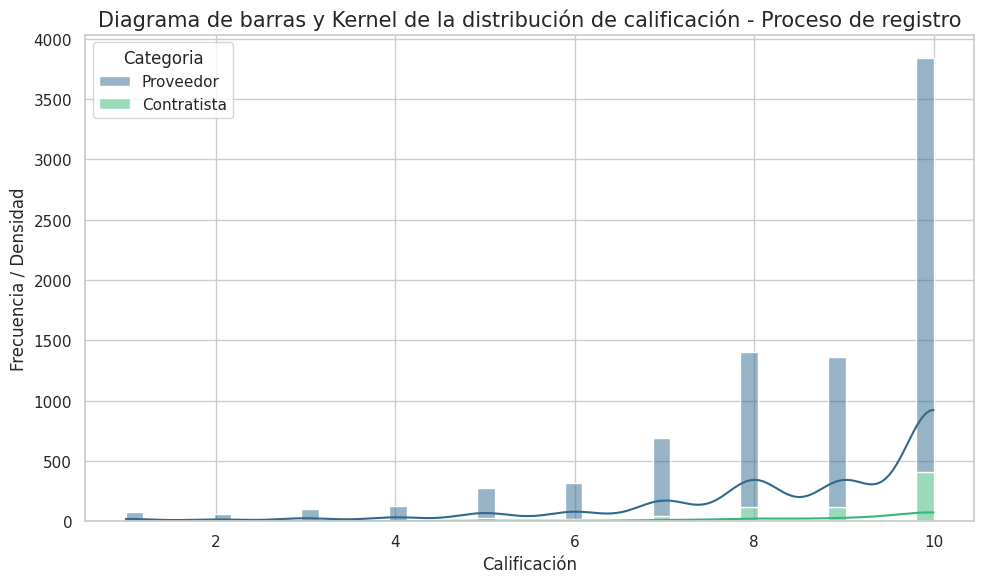

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_registro, x='Calificación', hue='Categoria', multiple='stack', kde=True, palette="viridis")
plt.title('Diagrama de barras y Kernel de la distribución de calificación - Proceso de registro', fontsize=15)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia / Densidad')
plt.tight_layout()
plt.show()

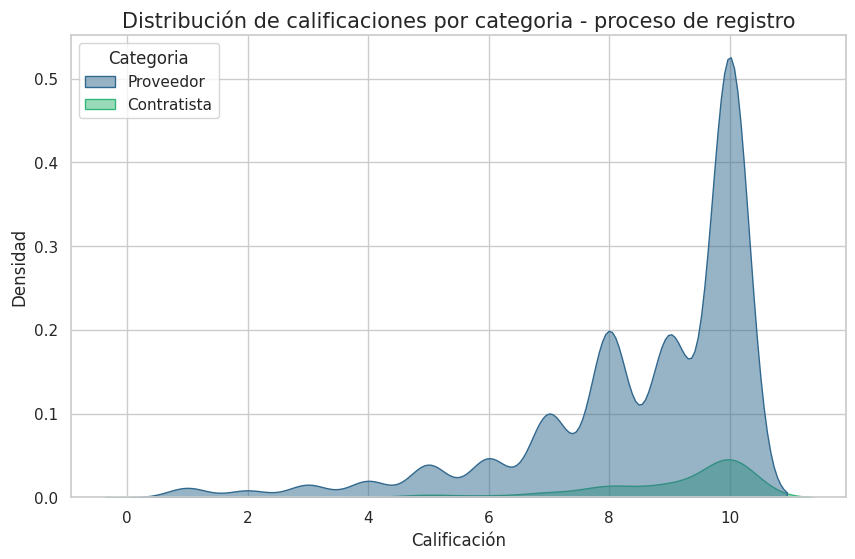

In [ ]:
# Gráfico más bello, con el kernel de la distribución de la variable de interés -Calificación- en el proceso de registro.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_registro, x='Calificación', hue='Categoria', fill=True, alpha=0.5, palette="viridis")
plt.title('Distribución de calificaciones por categoria - proceso de registro', fontsize=15)
plt.xlabel('Calificación')
plt.ylabel('Densidad')

plt.show()

El anterior gráfico muestra la exploración inicial de los datos de la variable *Calificación*. En el se observa las frecuencias relativas de cada puntuación consignada tanto por proveedores como por contratistas. Es decir, se muestra la forma en que se distribuyen las calificaciones de estos grupos en el proceso de registro. Este tipo de visualización permite comparar la forma y dispersión de las valoraciones, independientemente del tamaño de muestra de cada grupo, ya que la escala de densidad se ajusta automáticamente a cada muestra. En este sentido, el gráfico permite ver que aunque la mayor parte de proveedores califica el proceso de registro con puntuaciones altas, e incluso algunos asignan el puntaje máximo, existe mayor variabilidad entre la percepción de este grupo. Esta variabilidad se evidencia en los múltiples picos a lo largo del eje X. Por su parte, los contratistas de este proceso concentran su valoración en los niveles más altos, mostrando una percepción menos variable (sin picos).

Estas posibles diferencias justifican un análisis más detallado, donde se incluya una prueba estadística adecuada para este tipo de datos.

**Promedio de calificación en proveedores y contratistas**

In [ ]:
import plotly.graph_objects as go

# Calculate the number of observations for each 'Categoria'
observaciones_por_categoria = df_registro['Categoria'].value_counts().reset_index()
observaciones_por_categoria.columns = ['Categoria', 'Número de Observaciones']


promedio_general_registro = df_registro.groupby('Categoria')['Calificación'].mean().reset_index()


# Round the average to 2 decimal places
promedio_general_registro['Calificación'] = promedio_general_registro['Calificación'].round(2)

# Merge the observations with the average data
promedio_con_observaciones = pd.merge(promedio_general_registro, observaciones_por_categoria, on='Categoria')

# Display the result
print("\nPromedio de 'Calificación' en proveedores y contratistas:")
print(promedio_con_observaciones)

# Create the Plotly table
fig_combined = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Categoria</b>', '<b>Número de observaciones</b>','<b>Calificación promedio</b>'],
        fill_color='#90EE90',  # Verde claro para el encabezado
        font=dict(color='black', size=14), # Color de fuente para el encabezado
        align='center'
    ),
    cells=dict(
        values=[
            promedio_con_observaciones['Categoria'],
            promedio_con_observaciones['Número de Observaciones'], # Added missing comma here
            promedio_con_observaciones['Calificación']

        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=13)
    )
)])

fig_combined.update_layout(
    title_text='Proceso de registro',
    title_x=0.5,
    title_font=dict(size=12),
    width=700
)

fig_combined.show()


Promedio de 'Calificación' en proveedores y contratistas:
     Categoria  Calificación  Número de Observaciones
0  Contratista          8.90                      750
1    Proveedor          8.57                     7500


In [ ]:
# Agrupa por Año y Categoria para calcular promedios
tabla_promedios = df_registro.groupby(['Año', 'Categoria'])['Calificación'].mean().reset_index()

# Redondea a 2 decimales
tabla_promedios['Calificación'] = tabla_promedios['Calificación'].round(2)


# Calcula el número de observaciones por Año y Categoria
tabla_conteo = df_registro.groupby(['Año', 'Categoria']).size().reset_index(name='Observaciones')

# Calcula la desviación estándar por Año y Categoria
tabla_desviacion = df_registro.groupby(['Año', 'Categoria'])['Calificación'].std().reset_index(name='Desviación Estándar')

# Une las tablas de promedio, conteo y desviación estándar
tabla_completa = pd.merge(tabla_promedios, tabla_conteo, on=['Año', 'Categoria'])
tabla_completa = pd.merge(tabla_completa, tabla_desviacion, on=['Año', 'Categoria'])

# Redondea la desviación estándar a 2 decimales
tabla_completa['Desviación Estándar'] = tabla_completa['Desviación Estándar'].round(2)

# Crea tabla con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Año</b>', '<b>Categoria</b>', '<b>Observaciones</b>', '<b>Calificación Promedio</b>', '<b>Desviación Estándar</b>'],
        fill_color='#90EE90',  # Verde claro para el encabezado
        font=dict(color='black', size=14), # Color de fuente para el encabezado
        align='center'
    ),
    cells=dict(
        values=[
            tabla_completa['Año'],
            tabla_completa['Categoria'],
            tabla_completa['Observaciones'],
            tabla_completa['Calificación'],
            tabla_completa['Desviación Estándar']
        ],
        fill_color='#D3F9D3', # Verde más claro para las celdas
        align='center',
        font=dict(size=13)
    )
)])

# Título y diseño para ajustar el ancho de la tabla
fig.update_layout(
    title_text='Promedio de calificaciones por año - proceso de registro', # Título
    title_x=0.5,
    title_font=dict(size=15),
    width=800  # Cambia el ancho de la tabla
)

fig.show()

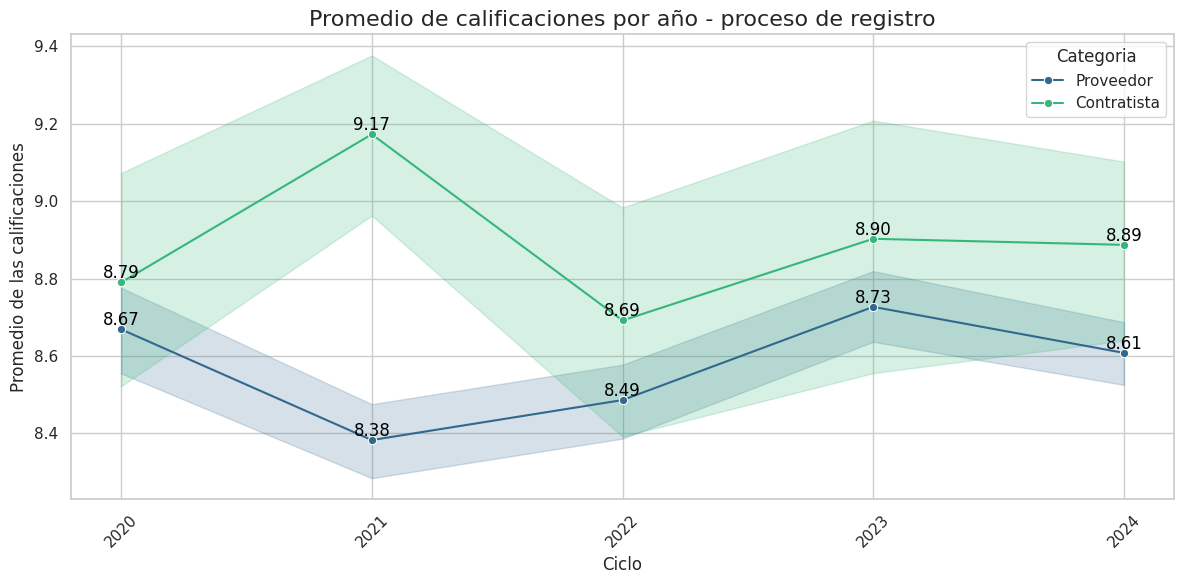

In [ ]:
# Calcula el promedio por año y categoria
df_media = df_registro.groupby(['Año', 'Categoria'])['Calificación'].mean().reset_index()

sns.set(style="whitegrid")
# Crea el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_registro.sort_values('Año'), x='Año', y='Calificación', hue='Categoria', marker="o", palette="viridis") # Added sort_values and palette

for index, row in df_media.iterrows():
    plt.text(row['Año'], row['Calificación'], f'{row["Calificación"]:.2f}', color='black', ha="center", va="bottom")

# Títulos y etiquetas
plt.title('Promedio de calificaciones por año - proceso de registro', fontsize=16)
plt.xlabel('Ciclo')
plt.ylabel('Promedio de las calificaciones')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

## Desición estadistica

Para conocer si estadisticamente la distribución de las calificaciones de proveedores está por debajo de la de contratistas en los trámites que evalua el proceso de registro, se realizará una prueba que ayude a confirmar o refutar esta hipótesis, para ello se eligió el **test de Wilcoxon** por ser el más indicado debido a la procedencia y caracteristicas de los datos de la variable *Calificación*.
El test de Wilcoxon consiste en ordenar las puntuaciones combinadas de ambos grupos y asignar un rango a cada observación, comenzando desde 1 para la observación más pequeña, independientemente de la muestra a la que pertenezca. En los empates, se asigna el rango promedio correspondiente de las observaciones empatadas. Posteriormente, se calcula la suma de los rangos para cada muestra por separado, y se determina si un grupo tiene valores menores que el otro. Es decir, si la distribución de calificaciones de un grupo tiende a ser estadisticamente menor que la distribución del otro.
En este caso, el resultado de la tabla indica con suficiente evidencia estadistica (P-valor < 0.05) una brecha entre la suma de los rangos de las calificaciones de proveedores frente a la de los contratistas. Con lo que se concluye finalmente que, existe evidencia estadistica suficiente para afirmar que los proveedores califican el proceso de registro con puntuaciones mayoritariamente por debajo a las de contratistas.





In [ ]:
from scipy.stats import mannwhitneyu
import plotly.graph_objects as go

# Filtra los datos por categoriaa
calificaciones_proveedor = df_registro[df_registro['Categoria'] == 'Proveedor']['Calificación']
calificaciones_contratista = df_registro[df_registro['Categoria'] == 'Contratista']['Calificación']

# Test de Wilcoxon-Mann-Whitney (una cola) - alternative='less' permite evaluar si la distribución de las calificaciones de proveedores en el proceso de registro esta por debajo de la distribución de calificaciones de contratistas
stat, p_valor = mannwhitneyu(calificaciones_proveedor, calificaciones_contratista, alternative='less')

print(f'Estadístico de prueba: {stat:.4f}')
print(f'P-valor: {p_valor:.4f}')


# Construye la tabla de resultados
tabla_resultado = pd.DataFrame({
    'Hipótesis': ['Distribución de calificaciones de proveedores ≥ Distribución de calificaciones de contratistas VS. Distribución de calificaciones de proveedores < Distribución de calificaciones de contratistas'],
    'Estadístico de prueba': [round(stat, 4)],
    'P-valor': [round(p_valor, 4)],
    'Conclusión': ['✅ Hay evidencia estadística suficiente para concluir que la distribución de calificación de proveedores es inferior a la de contratistas.' if p_valor < 0.05 else '❌  No hay evidencia estadística suficiente para afirmar que la distribución de calificación de proveedores es inferior']
})

# Resultados en tabla
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Hipótesis</b>', '<b>Estadístico de prueba</b>', '<b>P-valor</b>', '<b>Conclusión</b>'],
        fill_color='#90EE90',
        font=dict(color='black', size=14),
        align='center'
    ),
    cells=dict(
        values=[
            tabla_resultado['Hipótesis'],
            tabla_resultado['Estadístico de prueba'],
            tabla_resultado['P-valor'],
            tabla_resultado['Conclusión']
        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=13)
    )
)])

fig.update_layout(
    title_text='¿La distribución de calificaciones de proveedores es inferior a la de contratistas en el proceso de registro según el Test de Wilcoxon?',
    title_x=0.5,
    title_font=dict(size=12),
    width=990
)

fig.show()


Estadístico de prueba: 2509373.0000
P-valor: 0.0000


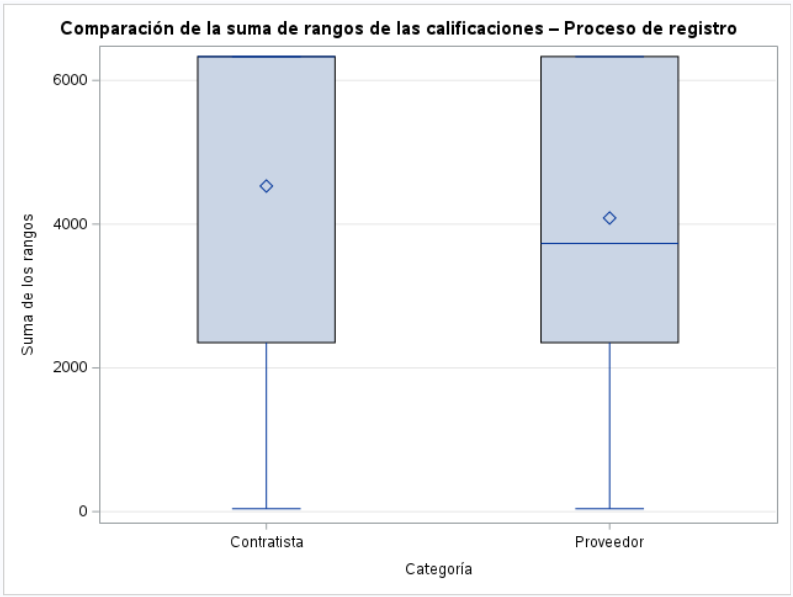

In [ ]:
pip install cliffs-delta

In [ ]:
# Reimporta librerías necesarias para el reset
from scipy.stats import mannwhitneyu
import numpy as np
import cliffs_delta

calificaciones_proveedor = df_registro[df_registro['Categoria'] == 'Proveedor']['Calificación']
calificaciones_contratista = df_registro[df_registro['Categoria'] == 'Contratista']['Calificación']


# Test de Wilcoxon
stat, p_valor = mannwhitneyu(calificaciones_proveedor, calificaciones_contratista, alternative='less')

# Tamaño de efecto r (Wilcoxon)
n1 = len(calificaciones_proveedor)
n2 = len(calificaciones_contratista)
N = n1 + n2

# Estimación del Z
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (N + 1) / 12)
z = (stat - mean_U) / std_U
r = z / np.sqrt(N)

# Cliff's Delta
d, size = cliffs_delta.cliffs_delta(calificaciones_proveedor.tolist(), calificaciones_contratista.tolist())

# Crea tabla de resultados
tabla_resultado = pd.DataFrame({
    'Métrica': [
        'Estadístico U',
        'p-valor',
        'r de Wilcoxon'
    ],
    'Resultado': [
        round(stat, 4),
        round(p_valor, 10),
        round(r, 4)
    ],
    'Relación': [
        'Estadistico de prueba para el test de Wilcoxon',
        'Significancia estadística para confirmar o refutar diferencias',
        'Magnitud de la diferencia entre la distribución de las calificaciones de proveedores y contratistas'
    ],
        'Interpretación': [
        'Valor no interpretado directamente. Compara si la distribución de calificación de proveedores es estadísticamente menor a la de contratistas, sin asumir normalidad en los datos.',
        'El p-valor < 0.05 permite rechazar la hipotesis nula ya que la probabilidad de cometer error es tan pequeña que se aproxima a cero',
        'Su rango va de -1 a +1, cuanto más cerca a cero, más pequeña es la diferencia.'
    ]
})

# Visualización con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Métrica</b>', '<b>Resultado</b>', '<b>Relación</b>', '<b>Interpretación</b>'],
        fill_color='#90EE90',
        align='center',
        font=dict(color='black', size=13)
    ),
    cells=dict(
        values=[
            tabla_resultado['Métrica'],
            tabla_resultado['Resultado'],
            tabla_resultado['Relación'],
            tabla_resultado['Interpretación']
        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=12)
    )
)])

fig.update_layout(
    title_text='Tamaño del efecto para la comparación entre la distribución de calificaciones: proveedor vs contratista',
    title_x=0.5,
    title_font=dict(size=14),
    width=1000
)

fig.show()


En la tabla anterior se utilizó el test de Wilcoxon para comparar la distribución entre las calificaciones de proveedores y las de contratistas. Aunque se encontró una diferencia estadísticamente significativa (p < 0.05), el tamaño del efecto (r = -0.0585) indica que la magnitud de esta diferencia es muy pequeña. Por tanto, tiene poca relevancia, indicando que ambos grupos califican de forma muy similar en promedio.

# **PROCESO DE CONTRATACIÓN**


In [ ]:
df_resultados_contratacion = pd.read_excel(ruta_excel, sheet_name='Contratacion_sin_canales') # lectura de los datos del proceso de contratación
df_resultados_contratacion.sample(5)

,Empresa,Año,Proceso,Sección,Pregunta,¿Impacta Indicador?,Calificación,Clasificador,Categoria
34656,ESSA,2020,Contratación,Satisfacción,Los requisitos exigidos en el proceso de solic...,SI,10,Promotor,Proveedor
20840,EMVARIAS,2020,Contratación,Recomendación,¿Recomendaría usted a una empresa amiga o cono...,SI,10,Promotor,Contratista
5333,Aguas Nacionales,2022,Contratación,Satisfacción,La actitud y disponibilidad del negociador par...,NO,10,Promotor,Proveedor
33163,ESSA,2023,Contratación,Fidelidad,¿Qué tan probable es que usted continúe presen...,SI,10,Promotor,Proveedor
18639,EDEQ,2020,Contratación,Satisfacción,La facilidad de encontrar los procesos de cont...,SI,10,Promotor,Contratista


In [ ]:
print(df_resultados_contratacion['Sección'].unique())

['Fidelidad' 'Recomendación' 'Satisfacción']


In [ ]:
df_resultados_contratacion['Año'] = df_resultados_contratacion['Año'].astype(str)  # Año como categórico

**Análisis exploratorio de los datos**

El gráfico representa la densidad de la variable de interés, es decir, la frecuencia relativa de las calificaciones en cada punto del eje X. En él se indica que los contratistas perciben el proceso de contratación de manera más positiva y uniforme, mientras que los proveedores muestran una mayor variabilidad en sus puntuaciones.

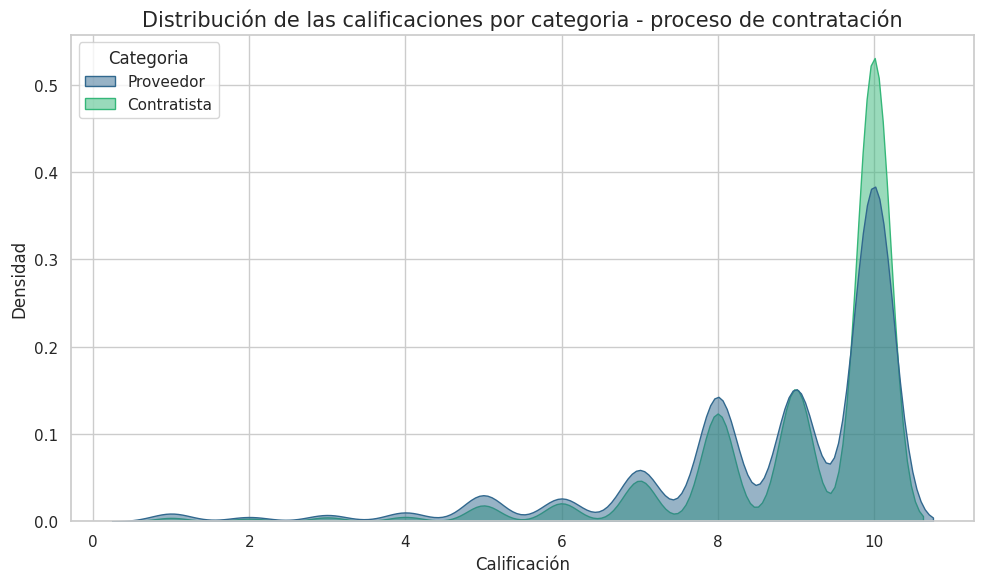

In [ ]:
# Gráfico de kernel de la distribución de las calificaciones - proceso de contratación
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_resultados_contratacion, x='Calificación', hue='Categoria', fill=True, alpha=0.5, palette="viridis")
plt.title('Distribución de las calificaciones por categoria - proceso de contratación', fontsize=15)
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

In [ ]:
preguntas_contratacion = pd.read_excel(ruta_excel, sheet_name='preguntasIndicadorContratación') # lectura de los datos que impactan directamente sobre los indicadores
preguntas_contratacion.sample(5)

,Empresa,Año,Proceso,Sección,Pregunta,¿Impacta Indicador?,Calificación,Clasificador,Categoria
8085,CHEC,2020,Contratación,Satisfacción,Los estudios de mercado que realizamos permite...,SI,10,Promotor,Contratista
2090,Aguas Nacionales,2021,Contratación,Satisfacción,La información suministrada sobre los resultad...,NO,10,Promotor,Contratista
9264,CHEC,2024,Contratación,Fidelidad,¿Qué tan probable es que usted continúe presen...,SI,10,Promotor,Proveedor
9628,CHEC,2023,Contratación,Satisfacción,Los estudios de mercado que realizamos permite...,SI,8,Neutro,Proveedor
10737,EDEQ,2020,Contratación,Recomendación,¿Recomendaría usted a una empresa amiga o cono...,SI,10,Promotor,Contratista


In [ ]:
promedio_general_Contratación = preguntas_contratacion.groupby('Categoria')['Calificación'].mean().reset_index()

# Round the average to 2 decimal places
promedio_general_Contratación['Calificación'] = promedio_general_Contratación['Calificación'].round(2)

# Calculate the number of observations for each 'Categoria' in preguntas_contratacion
observaciones_contratacion = preguntas_contratacion['Categoria'].value_counts().reset_index()
observaciones_contratacion.columns = ['Categoria', 'Número de observaciones']

# Merge the observations with the average data for contratación
promedio_con_observaciones_contratacion = pd.merge(promedio_general_Contratación, observaciones_contratacion, on='Categoria')

# Display the result
print("\nPromedio de 'Calificación' de proveedores y contratistas - Proceso de Contratación:")
print(promedio_con_observaciones_contratacion)

# Create the Plotly table for contratación
fig_combined_contratacion = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Categoria</b>', '<b>Número de observaciones</b>','<b>Calificación promedio</b>'],
        fill_color='#90EE90',  # Verde claro para el encabezado
        font=dict(color='black', size=14), # Color de fuente para el encabezado
        align='center'
    ),
    cells=dict(
        values=[
            promedio_con_observaciones_contratacion['Categoria'],
            promedio_con_observaciones_contratacion['Número de observaciones'],
            promedio_con_observaciones_contratacion['Calificación']

        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=13)
    )
)])

fig_combined_contratacion.update_layout(
    title_text='Promedio de calificaciones - proceso de contratación',
    title_x=0.5,
    title_font=dict(size=12),
    width=700
)

fig_combined_contratacion.show()


Promedio de 'Calificación' de proveedores y contratistas - Proceso de Contratación:
     Categoria  Calificación  Número de observaciones
0  Contratista          9.00                    10624
1    Proveedor          8.58                    11592


In [ ]:
# Agrupa por Año y categoria para calcular promedios
tabla_promedios_contratación = df_resultados_contratacion.groupby(['Año', 'Categoria'])['Calificación'].mean().reset_index()

# Redondear a 2 decimales
tabla_promedios_contratación['Calificación'] = tabla_promedios_contratación['Calificación'].round(2)


# Calcula el número de observaciones por Año y categorria
tabla_conteo_contratacion = df_resultados_contratacion.groupby(['Año', 'Categoria']).size().reset_index(name='Observaciones')

# Calcula la desviación estándar por Año y categorria
tabla_desviacion_contratacion = df_resultados_contratacion.groupby(['Año', 'Categoria'])['Calificación'].std().reset_index(name='Desviación Estándar')

# Une las tablas de promedio, conteo y desviación estándar
tabla_completa_contratacion = pd.merge(tabla_promedios_contratación, tabla_conteo_contratacion, on=['Año', 'Categoria'])
tabla_completa_contratacion = pd.merge(tabla_completa_contratacion, tabla_desviacion_contratacion, on=['Año', 'Categoria'])

# Redondea la desviación estándar a 2 decimales
tabla_completa_contratacion['Desviación Estándar'] = tabla_completa_contratacion['Desviación Estándar'].round(2)

# Crea tabla con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Año</b>', '<b>Categoria</b>', '<b>Observaciones</b>', '<b>Calificación Promedio</b>', '<b>Desviación Estándar</b>'],
        fill_color='#90EE90',  # Verde claro para el encabezado
        font=dict(color='black', size=14), # Color de fuente para el encabezado
        align='center'
    ),
    cells=dict(
        values=[
            tabla_completa_contratacion['Año'],
            tabla_completa_contratacion['Categoria'],
            tabla_completa_contratacion['Observaciones'],
            tabla_completa_contratacion['Calificación'],
            tabla_completa_contratacion['Desviación Estándar']
        ],
        fill_color='#D3F9D3', # Verde más claro para las celdas
        align='center',
        font=dict(size=13)
    )
)])

# Título y diseño, ajustando el ancho de la tabla
fig.update_layout(
    title_text='Promedio de calificaciones por año - proceso de contratación',
    title_x=0.5,
    title_font=dict(size=15),
    width=800
)

fig.show()

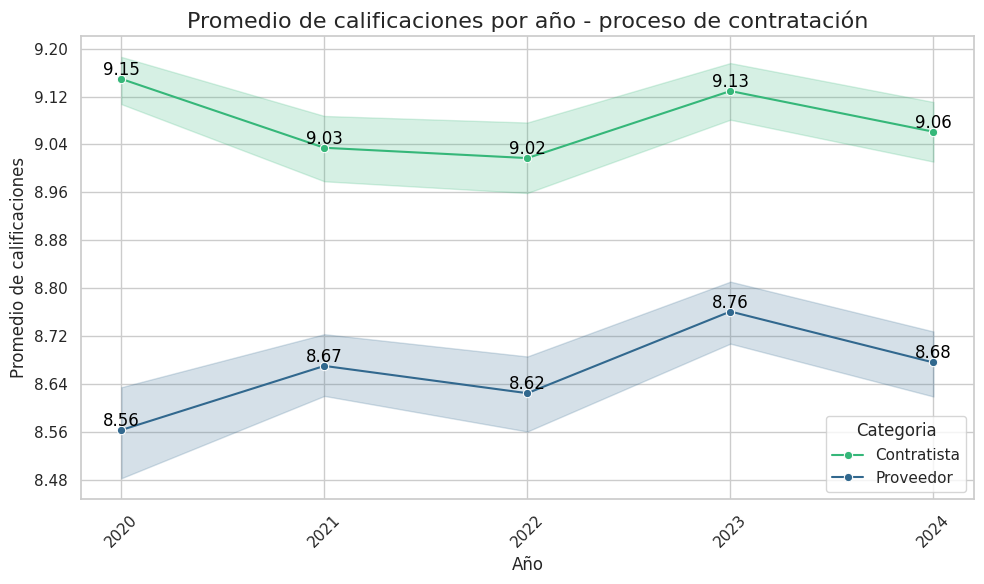

In [ ]:
df_media_contratacion = df_resultados_contratacion.groupby(['Año', 'Categoria'])['Calificación'].mean().reset_index()

sns.set(style="whitegrid")
# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))
# Intercambia los colores usando la paleta "viridis_r"
sns.lineplot(data=df_resultados_contratacion.sort_values('Año'), x='Año', y='Calificación', hue='Categoria', marker="o", palette="viridis_r") # Cambiado palette
# Añade los valores de la media como texto en el gráfico
for index, row in df_media_contratacion.iterrows():
    plt.text(row['Año'], row['Calificación'], f'{row["Calificación"]:.2f}', color='black', ha="center", va="bottom")
# Títulos y etiquetas
plt.title('Promedio de calificaciones por año - proceso de contratación', fontsize=16)
plt.xlabel('Año')
plt.ylabel('Promedio de calificaciones')
plt.xticks(rotation=45)
plt.legend(title='Categoria')

# Configurar los ejes para mostrar solo valores enteros
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))


plt.tight_layout()
plt.show()


**Desición estadística**

In [ ]:
# Filtra los datos por categoria
calificaciones_proveedor_contratacion = df_resultados_contratacion[df_resultados_contratacion['Categoria'] == 'Proveedor']['Calificación']
calificaciones_contratista_contratacion = df_resultados_contratacion[df_resultados_contratacion['Categoria'] == 'Contratista']['Calificación']

# Test de Wilcoxon-Mann-Whitney (una cola) - alternative='less' permite evaluar si la distribución de las calificaciones de proveedores en contratacion esta por debajo de la distribución de calificaciones de contratistas
stat_contratacion, p_valor_contratacion = mannwhitneyu(calificaciones_proveedor_contratacion, calificaciones_contratista_contratacion, alternative='less') # alternative='less' permite evaluar si calificaciones_proveedor_contratacion esta por debajo que calificaciones_contratista_contratacion

# Mostrar resultados
print(f'Estadístico de prueba (Contratación): {stat_contratacion:.4f}')
print(f'P-valor (Contratación): {p_valor_contratacion:.4f}')

# Construye la tabla de resultados para el proceso de contratación
tabla_resultado_contratacion = pd.DataFrame({
    'Hipótesis': ['Distribución de calificaciones de proveedores ≥ Distribución de calificaciones de contratista VS. Distribución de calificaciones de proveedores < Distribución de calificaciones de contratistas'],
    'Estadístico de prueba': [round(stat_contratacion, 4)],
    'P-valor': [round(p_valor_contratacion, 10)],
    'Desición estadística': ['✅ Hay evidencia estadística suficiente para concluir que la distribución de calificación de proveedores es inferior a la de contratistas.' if p_valor < 0.05 else '❌  No hay evidencia estadística suficiente para afirmar que la distribución de calificación de proveedores es inferior']
})

# Visualiza los resultados en una tabla
fig_contratacion = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Hipótesis</b>', '<b>Estadístico de prueba</b>', '<b>P-valor</b>', '<b>Conclusión</b>'],
        fill_color='#90EE90',
        font=dict(color='black', size=14),
        align='center'
    ),
    cells=dict(
        values=[
            tabla_resultado_contratacion['Hipótesis'],
            tabla_resultado_contratacion['Estadístico de prueba'],
            tabla_resultado_contratacion['P-valor'],
            tabla_resultado_contratacion['Desición estadística']
        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=13)
    )
)])

fig_contratacion.update_layout(
    title_text='¿La distribución de calificaciones de proveedores es inferior a la de contratistas en el proceso de contratación según el Test de Wilcoxon?',
    title_x=0.5,
    title_font=dict(size=12),
    width=990
)

fig_contratacion.show()

Estadístico de prueba (Contratación): 140147975.0000
P-valor (Contratación): 0.0000


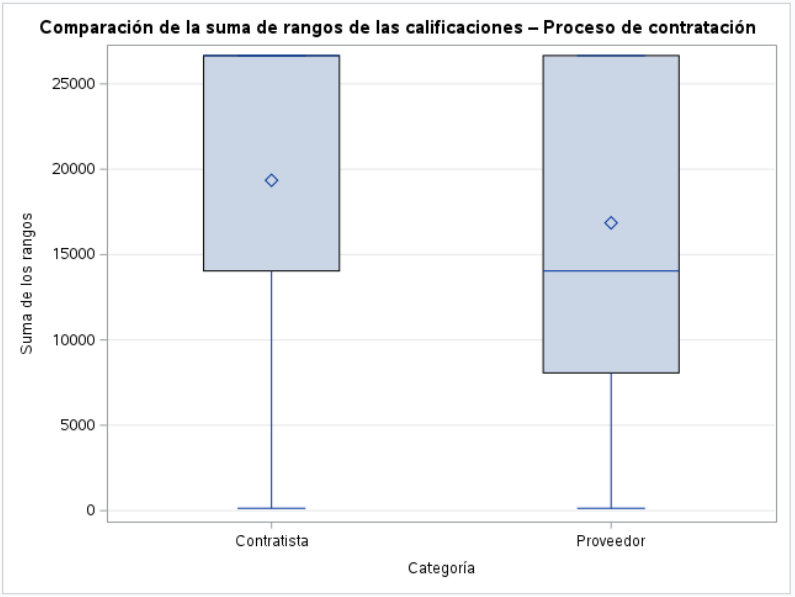

El P-valor representa la probabilidad de cometer un error al rechazar la hipotesis nula en este caso es tan pequeña que se aproxima a cero (<<<< 0.05).

In [ ]:
# Reimportar librerías necesarias para el reset
from scipy.stats import mannwhitneyu
import numpy as np
import cliffs_delta

proveedor = df_resultados_contratacion[df_resultados_contratacion['Categoria'] == 'Proveedor']['Calificación']
contratista = df_resultados_contratacion[df_resultados_contratacion['Categoria'] == 'Contratista']['Calificación']


# Test de Wilcoxon
stat, p_valor = mannwhitneyu(proveedor, contratista, alternative='less')

# Tamaño de efecto r (Wilcoxon)
n1 = len(proveedor)
n2 = len(contratista)
N = n1 + n2

# Estimación del Z
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (N + 1) / 12)
z = (stat - mean_U) / std_U
r = z / np.sqrt(N)

# Cliff's Delta
d, size = cliffs_delta.cliffs_delta(proveedor.tolist(), contratista.tolist())

# Crea tabla de resultados
tabla_resultado = pd.DataFrame({
    'Métrica': [
        'Estadístico U',
        'P-valor',
        'r de Wilcoxon'
    ],
    'Resultado': [
        round(stat, 4),
        round(p_valor, 10),
        round(r, 4)
    ],
    'Relación': [
        'Estadistico de prueba para el test de Wilcoxon',
        'Significancia estadística para confirmar o refutar diferencias',
        'Magnitud de la diferencia entre las calificaciones de proveedores y contratistas'
    ],
        'Interpretación': [
        'Valor no interpretado directamente. Permite comparar si la distribución de calificaciones de proveedores es estadísticamente menor a la de contratistas, sin asumir normalidad en los datos.',
        'El p-valor < 0.05 permite rechazar la hipotesis nula ya que la probabilidad de cometer error es tan pequeña que se aproxima a cero',
        'Su rango va de -1 a +1, cuanto más cerca a cero, más pequeña es la diferencia.'
    ]
})

# Visualización con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Métrica</b>', '<b>Resultado</b>', '<b>Relación</b>', '<b>Interpretación</b>'],
        fill_color='#90EE90',
        align='center',
        font=dict(color='black', size=13)
    ),
    cells=dict(
        values=[
            tabla_resultado['Métrica'],
            tabla_resultado['Resultado'],
            tabla_resultado['Relación'],
            tabla_resultado['Interpretación']
        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=12)
    )
)])

fig.update_layout(
    title_text='Tamaño del efecto para la comparación entre la distribución de las calificaciones: proveedor vs. contratista',
    title_x=0.5,
    title_font=dict(size=14),
    width=1000
)

fig.show()

# **Aguas del Oriente**

**Dado que el indicador de Lealtad para Aguas del Oriente ha mostrado una diferencia entre el arrojado por el modelo QlikView y el calculado manualmente en Excel, se constatará dicho resultado por este medio**

**Para su calculo se consolidó las respuestas de sus contratistas en cada proceso**



In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns


In [ ]:
ruta_excel = '/content/Resultados.xlsx'
Oriente = pd.read_excel(ruta_excel, sheet_name='ConsolidadoOriente')

# Una muestra de 5 observciones de los datos para verificar que se hayan leido correctamente
Oriente.sample(5)

,Empresa,Año,Encuesta,Seccion,Pregunta,¿Pregunta Indicador?,Respuesta,Clasificador,Respuesta Verdadera/Falsa,Relación Grupo EPM,ACM Contratista,Nombre participante,Usuario Participante,¿Es Contratista? - Registro,¿Es Contratista? - Contratación,¿Es Contratista? - Admon
140,CHEC,2024,Encuesta del Proceso de Registro en Ariba,Satisfacción,¿Es pertinente y razonable la información soli...,SI,7,Crítico,NaN,Proveedor,ACM_67733456,Luis Fernando Villegas Gutiérrez,contacto@villegasac.com,SI,NO,NO
192,EPM,2024,Encuesta del Proceso de Registro en Ariba,Fidelidad,¿Qué tan probable es que usted mantenga su reg...,SI,10,Promotor,NaN,Proveedor,ACM_75257221,JADER ALBERTO MONTOYA,eventostotalesproducciones@gmail.com,SI,NO,NO
55,Aguas Nacionales,2024,Encuesta del Proceso de Registro en Ariba,Recomendación,¿Recomendaría usted a una empresa amiga o cono...,SI,9,Neutro,NaN,Proveedor,ACM_62418727,JONATHAN VELASCO ARCE,jav900129@gmail.com,SI,NO,NO
36,Aguas de Oriente,2024,Encuesta del Proceso Contratación,Satisfacción,La facilidad de encontrar los procesos de cont...,SI,8,Neutro,NaN,NO,ACM_7974186,Aura Prada,Aura.Prada@marsh.com,NO,Si,SI
161,EDEQ,2024,Encuesta del Proceso de Registro en Ariba,Satisfacción,¿El Grupo EPM aprueba de manera oportuna el tr...,SI,9,Neutro,NaN,Proveedor,ACM_71883298,Benjamin Hernandez,ControlRisks.EPM@controlrisks.com,SI,NO,NO


In [ ]:
import plotly.graph_objects as go
# Calcula el porcentaje de cada categoría de la columna 'Clasificador'
porcentaje_clasificador_oriente = Oriente['Clasificador'].value_counts(normalize=True) * 100

# Convierte a DataFrame para una mejor visualización
df_porcentaje_clasificador_oriente = porcentaje_clasificador_oriente.reset_index()
df_porcentaje_clasificador_oriente.columns = ['Clasificador', 'Porcentaje']

# Redondea el porcentaje a 2 decimales
df_porcentaje_clasificador_oriente['Porcentaje'] = df_porcentaje_clasificador_oriente['Porcentaje'].round(2)

# Imprime el resultado
print("Porcentaje de cada categoría en la columna 'Clasificador':")
print(df_porcentaje_clasificador_oriente)

# Visualiza en una tabla con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Clasificador</b>', '<b>Porcentaje (%)</b>'],
        fill_color='#90EE90',
        font=dict(color='black', size=14),
        align='center'
    ),
    cells=dict(
        values=[
            df_porcentaje_clasificador_oriente['Clasificador'],
            df_porcentaje_clasificador_oriente['Porcentaje']
        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=13)
    )
)])

fig.update_layout(
    title_text='Porcentaje por categoria para el indicador de Lealtad',
    title_x=0.5,
    title_font=dict(size=15),
    width=600
)

fig.show()


Porcentaje de cada categoría en la columna 'Clasificador':
  Clasificador  Porcentaje
0     Promotor       56.75
1       Neutro       29.76
2      Crítico       13.49


**El resultado de la tabla anterior coincide con el calculado manualmente en Excel, mientras que el arrojado por el modelo de QlikView se muestra en la imagen. La hipotesis que se tiene acerca de esta diferencia es que internamente el modelo está calculando el porcentaje de Promotores, Neutros y Críticos de la columna "Clasificador" de manera diferente a la herramienta Excel (esto es posible observarlo en la diferencia entre los resultados anteriores y los resultados que se enmarcan en la imagen).**



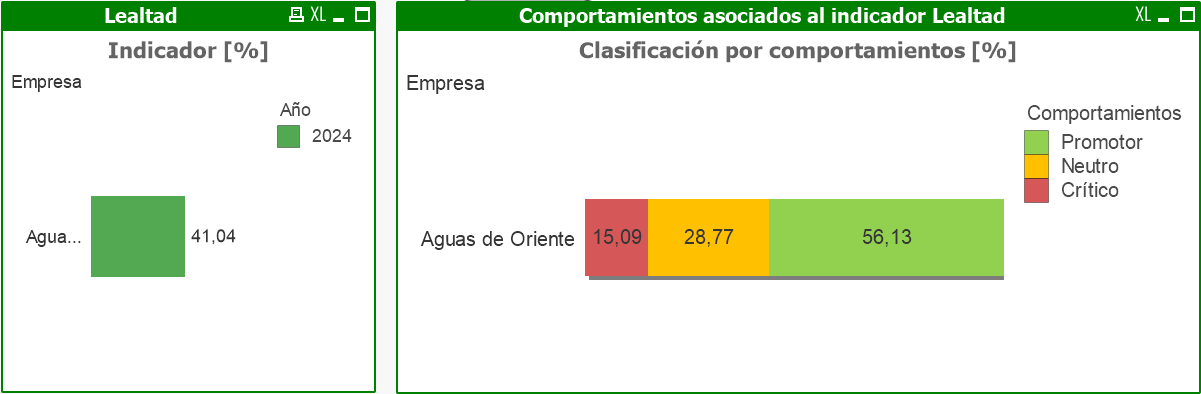

In [ ]:
# Filtra el porcentaje de Promotor y Crítico
porcentaje_promotor = df_porcentaje_clasificador_oriente[df_porcentaje_clasificador_oriente['Clasificador'] == 'Promotor']['Porcentaje'].iloc[0]
porcentaje_critico = df_porcentaje_clasificador_oriente[df_porcentaje_clasificador_oriente['Clasificador'] == 'Crítico']['Porcentaje'].iloc[0]

# Calcula la diferencia
diferencia_porcentaje = porcentaje_promotor - porcentaje_critico

print(f"El porcentaje de Promotor es: {porcentaje_promotor:.2f}%")
print(f"El porcentaje de Crítico es: {porcentaje_critico:.2f}%")
print(f"La diferencia (Promotor - Crítico) es: {diferencia_porcentaje:.2f}%")

# Crea una tabla con Plotly para mostrar la diferencia
df_diferencia = pd.DataFrame({
    'Cálculo': ['Promotor - Crítico'],
    'Diferencia de Porcentaje (%)': [round(diferencia_porcentaje, 2)]
})

fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Cálculo</b>', '<b>Diferencia de Porcentaje (%)</b>'],
        fill_color='#90EE90',
        font=dict(color='black', size=14),
        align='center'
    ),
    cells=dict(
        values=[
            df_diferencia['Cálculo'],
            df_diferencia['Diferencia de Porcentaje (%)']
        ],
        fill_color='#D3F9D3',
        align='center',
        font=dict(size=13)
    )
)])

fig.update_layout(
    title_text='Indicador de Lealtad de Aguas de Oriente',
    title_x=0.5,
    title_font=dict(size=15),
    width=500
)

fig.show()

El porcentaje de Promotor es: 56.75%
El porcentaje de Crítico es: 13.49%
La diferencia (Promotor - Crítico) es: 43.26%


# INDICADORES PRINCIPALES - EPM

---



Los datos de los indicadores principales fueron extraidos del modelo en QlikView. En ellos solo se tuvo en cuenta la valoración de contratistas.

In [ ]:
file_path = '/content/Resultados.xlsx'
sheet_name = 'Indicadores_GeneralesEPM'

Indicadores_Generales = pd.read_excel(file_path, sheet_name=sheet_name)

print(Indicadores_Generales.head())

   Sección   Año  Indicador
0  Lealtad  2024  47.666336
1  Lealtad  2023  50.274725
2  Lealtad  2022  59.171598
3  Lealtad  2021  54.573805
4  Lealtad  2020  54.892436


In [ ]:
df=Indicadores_Generales

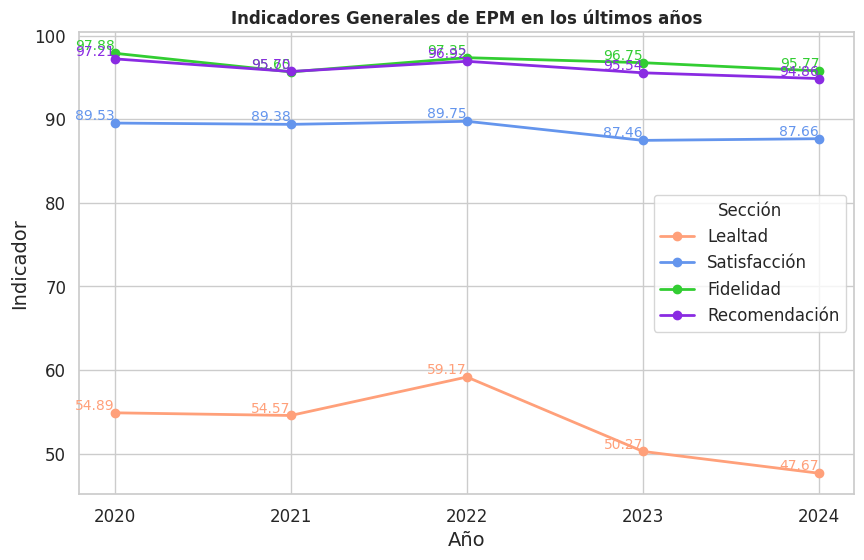

In [ ]:
colores = ["#FFA07A", "#6495ED", "#32CD32", "#8A2BE2"]

# Crear la gráfica con colores diferenciados
plt.figure(figsize=(10, 6))

for i, seccion in enumerate(df["Sección"].unique()):
    subset = df[df["Sección"] == seccion]
    plt.plot(subset["Año"], subset["Indicador"], marker='o', label=seccion, color=colores[i], linewidth=2)

    # Agregar etiquetas con los valores en cada punto
    for x, y in zip(subset["Año"], subset["Indicador"]):
        plt.text(x, y, f"{y:.2f}", fontsize=10, ha='right', va='bottom', color=colores[i])

# Configuración del gráfico con títulos
plt.xlabel("Año", fontsize=14)
plt.ylabel("Indicador", fontsize=14)
plt.title("Indicadores Generales de EPM en los últimos años", fontsize=12, fontweight='bold')
plt.legend(title="Sección", fontsize=12)
plt.grid(True)
plt.xticks(df["Año"].unique(), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# INDICADORES POR PROCESO PARA EPM

**PROCESO REGISTRO**

In [ ]:
file_path = '/content/Resultados.xlsx'
sheet_name = 'IndicadoresRegistroEPM'

IndicadoresRegistro = pd.read_excel(file_path, sheet_name=sheet_name)

print(IndicadoresRegistro.head())

        Sección   Año  Indicador [%]
0  Satisfacción  2024      86.290323
1  Satisfacción  2023      84.791667
2  Satisfacción  2022      84.375000
3  Satisfacción  2021      89.722222
4  Satisfacción  2020      84.891304


El gráfico muestra la evolución temporal de los indicadores del proceso de registro desde 2020 hasta 2024. El valor de la fidelidad en 2023 se desvía positivamente del resto. Satisfacción ha tenido un desempeño inferior y estancado, indicando la necesidad de intervenir con acciones concretas para elevar la percepción de este proceso. Por su parte la recomendación muestra el comportamiento más estable.

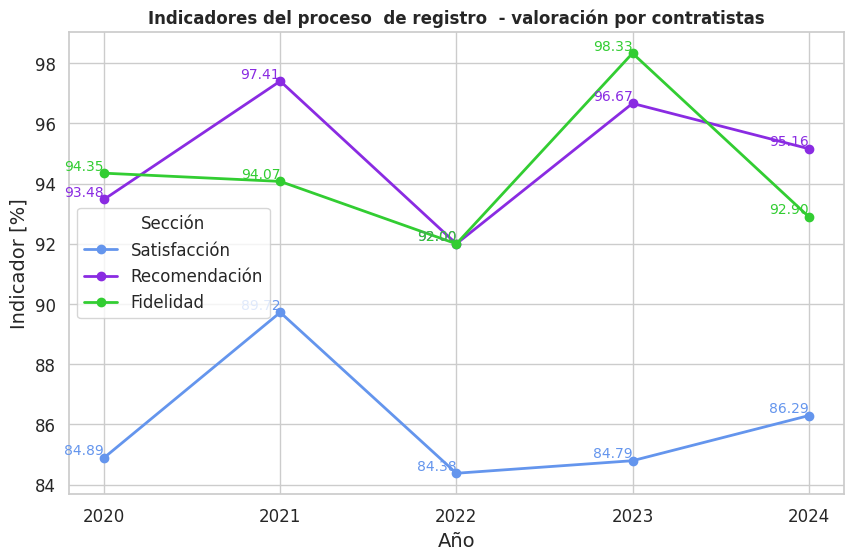

In [ ]:
colores = ["#6495ED", "#8A2BE2","#32CD32"]

# Crear la gráfica
plt.figure(figsize=(10, 6))

for i, seccion in enumerate(IndicadoresRegistro["Sección"].unique()):
    subset = IndicadoresRegistro[IndicadoresRegistro["Sección"] == seccion]
    plt.plot(subset["Año"], subset["Indicador [%]"], marker='o', label=seccion, color=colores[i], linewidth=2)

    # Agrega etiquetas con los valores en cada punto
    for x, y in zip(subset["Año"], subset["Indicador [%]"]):
        plt.text(x, y, f"{y:.2f}", fontsize=10, ha='right', va='bottom', color=colores[i])

# Configuración del gráfico con títulos
plt.xlabel("Año", fontsize=14)
plt.ylabel("Indicador [%]", fontsize=14)
plt.title("Indicadores del proceso  de registro  - valoración por contratistas", fontsize=12, fontweight='bold')
plt.legend(title="Sección", fontsize=12)
plt.grid(True)
plt.xticks(IndicadoresRegistro["Año"].unique(), fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la gráfica
plt.show()

**PROCESO CONTRATACIÓN**

In [ ]:
file_path = '/content/Resultados.xlsx'
sheet_name = 'IndicadoresContrataciónEPM'

IndicadoresContratación = pd.read_excel(file_path, sheet_name=sheet_name)

print(IndicadoresContratación.head())

        Sección   Año  Indicador [%]
0  Satisfacción  2024      86.206897
1  Satisfacción  2023      85.675676
2  Satisfacción  2022      88.804348
3  Satisfacción  2021      87.820513
4  Satisfacción  2020      89.011799


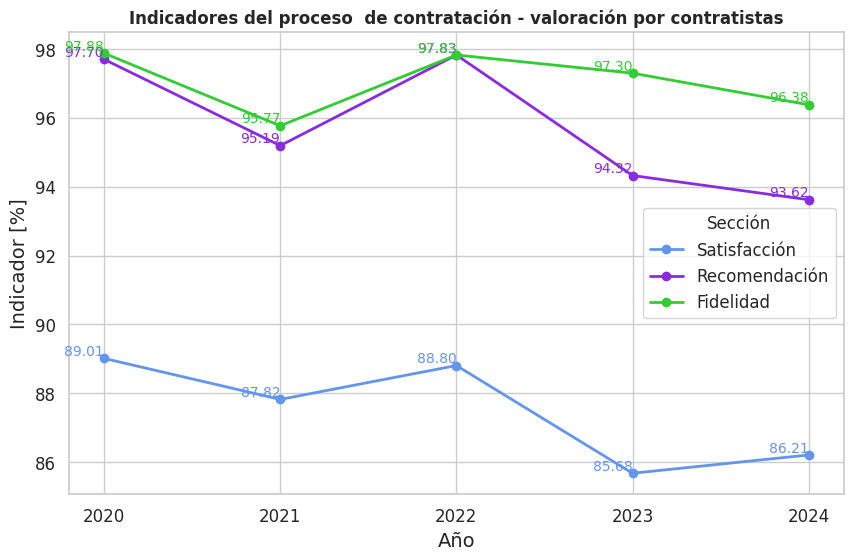

In [ ]:
colores = ["#6495ED", "#8A2BE2","#32CD32"]

# Crea la gráfica
plt.figure(figsize=(10, 6))

for i, seccion in enumerate(IndicadoresContratación["Sección"].unique()):
    subset = IndicadoresContratación[IndicadoresContratación["Sección"] == seccion]
    plt.plot(subset["Año"], subset["Indicador [%]"], marker='o', label=seccion, color=colores[i], linewidth=2)

    # Agrega etiquetas con los valores en cada punto de calificación
    for x, y in zip(subset["Año"], subset["Indicador [%]"]):
        plt.text(x, y, f"{y:.2f}", fontsize=10, ha='right', va='bottom', color=colores[i])

# Configuración del gráfico con títulos
plt.xlabel("Año", fontsize=14)
plt.ylabel("Indicador [%]", fontsize=14)
plt.title("Indicadores del proceso  de contratación - valoración por contratistas", fontsize=12, fontweight='bold')
plt.legend(title="Sección", fontsize=12)
plt.grid(True)
plt.xticks(IndicadoresContratación["Año"].unique(), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**PROCESO DE ADMINISTRACIÓN DE CONTRATOS**

In [ ]:
file_path = '/content/Resultados.xlsx'
sheet_name = 'IndicadoresAdministraciónEPM'

IndicadoresAdministración = pd.read_excel(file_path, sheet_name=sheet_name)

print(IndicadoresAdministración.head())

        Sección   Año  Indicador [%]
0  Satisfacción  2024      93.361345
1  Satisfacción  2023      94.270833
2  Satisfacción  2022      95.546218
3  Satisfacción  2021      92.890625
4  Satisfacción  2020      95.413534


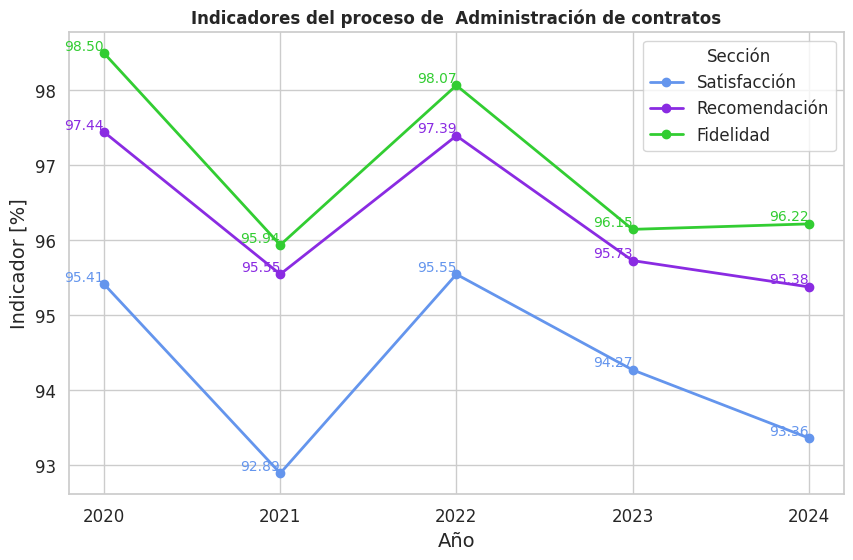

In [ ]:
colores = ["#6495ED", "#8A2BE2","#32CD32"]

# Crea la gráfica
plt.figure(figsize=(10, 6))

for i, seccion in enumerate(IndicadoresAdministración["Sección"].unique()):
    subset = IndicadoresAdministración[IndicadoresAdministración["Sección"] == seccion]
    plt.plot(subset["Año"], subset["Indicador [%]"], marker='o', label=seccion, color=colores[i], linewidth=2)

    # Agrega etiquetas con los valores en cada punto
    for x, y in zip(subset["Año"], subset["Indicador [%]"]):
        plt.text(x, y, f"{y:.2f}", fontsize=10, ha='right', va='bottom', color=colores[i])

# Configuración del gráfico con títulos
plt.xlabel("Año", fontsize=14)
plt.ylabel("Indicador [%]", fontsize=14)
plt.title("Indicadores del proceso de  Administración de contratos", fontsize=12, fontweight='bold')
plt.legend(title="Sección", fontsize=12)
plt.grid(True)
plt.xticks(IndicadoresAdministración["Año"].unique(), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [81]:
file_path = '/content/Resultados.xlsx'
sheet_name = 'FactoresCríticosEPM'

Críticos = pd.read_excel(file_path, sheet_name=sheet_name)

print(Críticos.head())

        Proceso       Sección  \
0      Registro  Satisfacción   
1      Registro  Satisfacción   
2      Registro     Fidelidad   
3      Registro     Fidelidad   
4  Contratación  Satisfacción   

                                            Pregunta   Año  Indicador  
0  ¿Es claro el lenguaje utilizado para realizar ...  2023  86.250000  
1  ¿Es claro el lenguaje utilizado para realizar ...  2024  83.870968  
2  ¿Qué tan probable es que usted mantenga su reg...  2023  98.333333  
3  ¿Qué tan probable es que usted mantenga su reg...  2024  92.903226  
4  La facilidad de encontrar los procesos de cont...  2023  85.675676  


Los aspectos que más disminuyeron y cuyo resultado impacta directamente sobre los indicadores principales de EPM se muestran en el siguiente diagrama de barras

/tmp/ipython-input-82-3006298713.py:13: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.

/tmp/ipython-input-82-3006298713.py:24: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



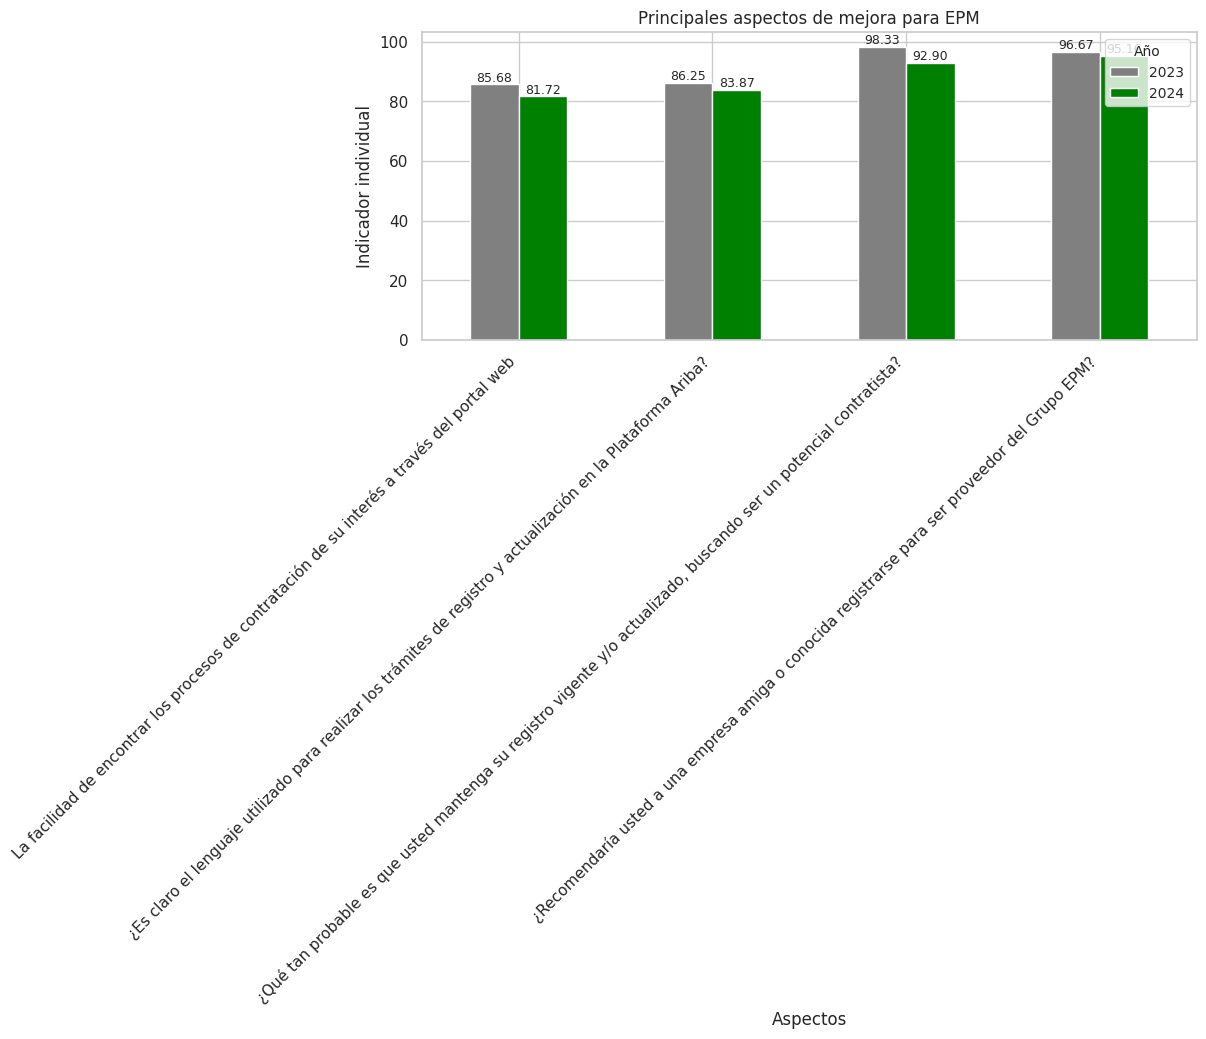

In [82]:
Factores  = Críticos.groupby(['Pregunta', 'Año'])['Indicador'].mean().unstack()

# Create a color palette with green shades for the two years
colors = ['#808080', '#008000']

# Create the bar plot with the custom color palette
ax = Factores.plot(kind='bar', figsize=(10, 4), color=colors)
plt.xlabel("Aspectos")
plt.ylabel("Indicador individual")
plt.title("Principales aspectos de mejora para EPM")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Año")
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Año", loc="upper right")


# Agrega los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9) # Formatea a 2 decimales y ajusta el tamaño de la fuente

# Asegurarse de que las etiquetas no se superpongan
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Año", loc="upper right", fontsize=10, title_fontsize=10)


plt.show()

Los anteriores gráficos y su interpretación se muestran en el análisis de los resultados apra EPM